In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d samuelcortinhas/cats-and-dogs-image-classification

 99% 64.0M/64.4M [00:02<00:00, 41.4MB/s]
100% 64.4M/64.4M [00:02<00:00, 27.6MB/s]


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cats-and-dogs-image-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [46]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 557 files belonging to 2 classes.
Found 140 files belonging to 2 classes.


In [47]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [48]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [50]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [51]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
18/18 [==============================] - 7s 149ms/step - loss: 6.4826 - accuracy: 0.5601 - val_loss: 1.1604 - val_accuracy: 0.5286
Epoch 2/10
18/18 [==============================] - 4s 148ms/step - loss: 4.4082 - accuracy: 0.6158 - val_loss: 3.8906 - val_accuracy: 0.4571
Epoch 3/10
18/18 [==============================] - 4s 155ms/step - loss: 3.1579 - accuracy: 0.6338 - val_loss: 8.8487 - val_accuracy: 0.4857
Epoch 4/10
18/18 [==============================] - 4s 150ms/step - loss: 2.0532 - accuracy: 0.7056 - val_loss: 6.0599 - val_accuracy: 0.5000
Epoch 5/10
18/18 [==============================] - 4s 151ms/step - loss: 1.6974 - accuracy: 0.7199 - val_loss: 3.0486 - val_accuracy: 0.5143
Epoch 6/10
18/18 [==============================] - 5s 169ms/step - loss: 2.0398 - accuracy: 0.7020 - val_loss: 3.2057 - val_accuracy: 0.5214
Epoch 7/10
18/18 [==============================] - 4s 149ms/step - loss: 1.3764 - accuracy: 0.7558 - val_loss: 2.4759 - val_accuracy: 0.5571
Epoch 

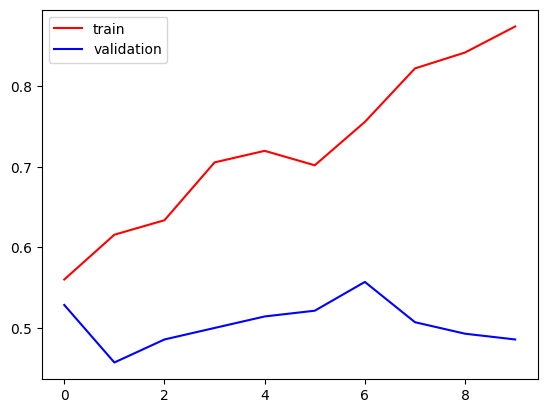

In [52]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

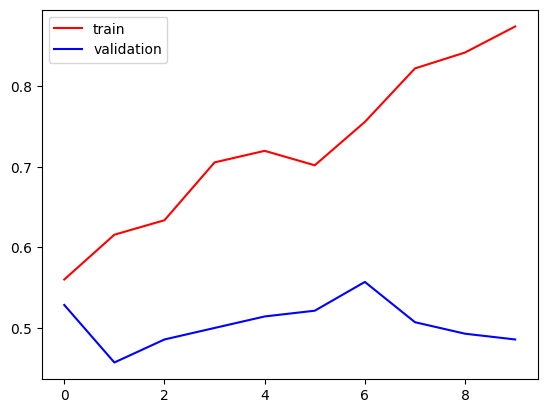

In [53]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

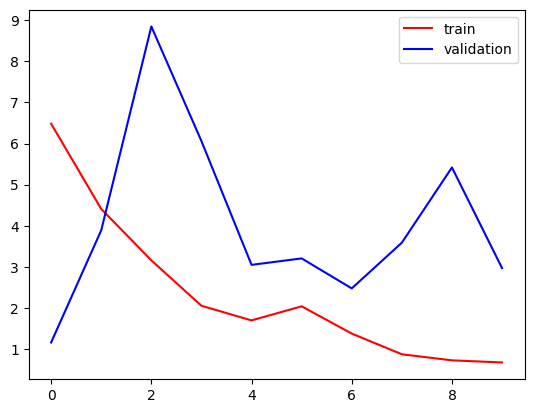

In [54]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [55]:
import cv2

In [77]:
test_img = cv2.imread('/content/dog_0.jpg')

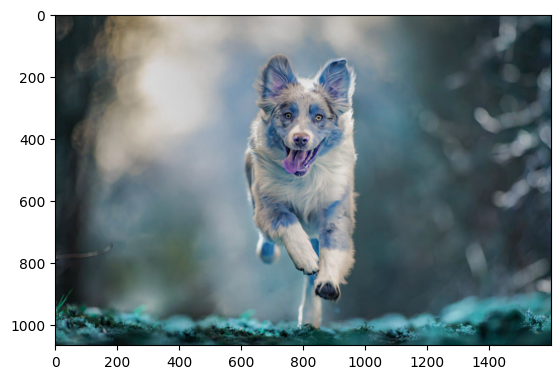

In [78]:

plt.imshow(test_img)

In [79]:
test_img.shape

(1067, 1600, 3)

In [80]:
test_img = cv2.resize(test_img,(256,256))

In [81]:
test_input = test_img.reshape((1,256,256,3))

In [82]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)